# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [2]:
# Add any additional import statements you need here
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/katiehu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# change `data_location` to the location of the folder on your machine.
data_location = "/Users/katiehu/Documents/GitHub/ads-tm-token-norm"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [74]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """
    
    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(Counter(tokens).keys())
    lexical_diversity = round((num_unique_tokens/num_tokens),2) # Rounded to 2 Digits to match format of existing decimal rounding below
    num_characters = sum(len(i) for i in tokens)
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [72]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.690 in the data.


Q: Why is it beneficial to use assertion statements in your code? 

A: Assertion statements are ideal because it allows an extra verification check to ensure that the defined function being executed is performing in the manner that we ask it to. This allows me to ensure that the function is outputting the correct information. 

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [40]:
# Read in the lyrics data

lyrics_path = f"{data_location}/{lyrics_folder}"

lyrics = defaultdict(dict)
for file in os.listdir(lyrics_path):
    if os.path.isdir(lyrics_path + file):
        for lyric_page in os.listdir(lyrics_path + file):
            artist,song = lyric_page.split("_")
            song = song.replace(".txt", "")
            lyrics[file][song] = open(lyrics_path + file + "/" + lyric_page).read()



In [7]:
# Read in the twitter data

twitter_path = f"{data_location}/{twitter_folder}"

desc_files = [f for f in os.listdir(twitter_path) if "followers_data" in f]

twitter = defaultdict(list)

for f in desc_files:
    artist = f.split("_")[0]
    with open(twitter_path + f, 'r', encoding='utf8') as infile:
        next(infile)
        for idx, line in enumerate(infile.readlines()):
            line = line.strip().split("\t")
            if len(line) == 7:
                twitter[artist].append(line[6])

## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [8]:
punctuation = set(punctuation) # speeds up comparison

Pipeline Creation below did not work. I could not troubleshoot it to work.

In [38]:
# create your clean twitter data here

# split on whitespace
def tokenize(tokens):
    for k, v in tokens.items():
        return [i.split() for i in v]

# fold to lowercase
def lowercase(tokens):
    for k, v in tokens.items():
        return [i.lower() for i in v]
    
# remove punctuation
def remove_punctuation(tokens):
    for k, v in tokens.items():
        return [i for i in v if i not in punctuation]

# remove stopwords
def remove_stopwords(tokens):
    for k, v in tokens.items():
        return [i for i in v if i.lower() not in sw]

def pipeline(tokens):
    corpus = tokenize(tokens)
    lower = lowercase(corpus)
    punct = remove_punctuation(lower)
    return remove_stopwords(punct)



In [44]:
# create your clean lyrics data here

lyrics_processed = defaultdict(list)

for artist in lyrics:
    for song in lyrics[artist]:
        # Remove Punctuation
        lyrics_revised = "".join([i for i in lyrics[artist][song] if i not in punctuation])
        
        # Lowercase and Tokenize
        lyrics_revised = [file.lower().strip() for file in lyrics_revised.split()]

        # Remove Stopwords
        lyrics_revised = [file for file in lyrics_revised if file not in sw]

        lyrics_processed[artist].extend(lyrics_revised)

In [ ]:
twitter_path = f"{data_location}/{twitter_folder}"

desc_files = [f for f in os.listdir(twitter_path) if "followers_data" in f]

twitter = defaultdict(list)

for f in desc_files:
    artist = f.split("_")[0]
    with open(twitter_path + f, 'r', encoding='utf8') as infile:
        next(infile)
        for idx, line in enumerate(infile.readlines()):
            line = line.strip().split("\t")
            if len(line) == 7:
                twitter[artist].append(line[6])

In [45]:
# create your clean twitter data here

twitter_processed = defaultdict(list)

for artist in twitter:

    desc = " ".join(twitter[artist])

    # Remove Punctuation
    desc = "".join([i for i in desc if i not in punctuation])
        
    # Lowercase and Tokenize
    desc = [file.lower().strip() for file in desc.split()]

    # Remove Stopwords
    desc = [file for file in desc if file not in sw]

    twitter_processed[artist].extend(desc)

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [75]:
# calls to descriptive_stats here
print('''Descriptive Statistics for Robyn's Lyrics''')
print('')
descriptive_stats(lyrics_processed['robyn'], num_tokens = 10)
print('')
print('''Descriptive Statistics for Robyn's Twitter''')
print('')
descriptive_stats(twitter_processed['robynkonichiwa'], num_tokens = 10)
print('')
print('''Descriptive Statistics for Cher's Twitter''')
print('')
descriptive_stats(lyrics_processed['cher'], num_tokens = 10)
print('')
print('''Descriptive Statistics for Cher's Twitter''')
print('')
descriptive_stats(twitter_processed['cher'], num_tokens = 10)

Descriptive Statistics for Robyn's Lyrics

There are 15227 tokens in the data.
There are 2156 unique tokens in the data.
There are 73787 characters in the data.
The lexical diversity is 0.140 in the data.

Descriptive Statistics for Robyn's Twitter

There are 1495526 tokens in the data.
There are 252736 unique tokens in the data.
There are 9127817 characters in the data.
The lexical diversity is 0.170 in the data.

Descriptive Statistics for Cher's Twitter

There are 35916 tokens in the data.
There are 3703 unique tokens in the data.
There are 172634 characters in the data.
The lexical diversity is 0.100 in the data.

Descriptive Statistics for Cher's Twitter

There are 15670504 tokens in the data.
There are 1517718 unique tokens in the data.
There are 92951718 characters in the data.
The lexical diversity is 0.100 in the data.


[15670504, 1517718, 0.1, 92951718]

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: I believe that if the stopwords were left in the data, the top 5 words would be mostly stopwords such as the, and, as stopwords are common to be filled in with sentences.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: Both artists seem to be more similar as both sing about love.



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [50]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [51]:
emojis = defaultdict(list)

for artist in twitter:
    for desc in twitter[artist]:
        emojis[artist].extend([i for i in desc if emoji.is_emoji(i)])

for artist in emojis:
    print(artist)
    print(Counter(emojis[artist]).most_common(10))

cher
[('❤', 79223), ('🌈', 47549), ('♥', 33978), ('🏳', 33412), ('✨', 29468), ('💙', 21379), ('🏻', 20930), ('🌊', 20223), ('✌', 16773), ('💜', 16550)]
robynkonichiwa
[('❤', 4783), ('🌈', 4685), ('🏳', 3528), ('♥', 3103), ('✨', 2223), ('🏻', 1495), ('✌', 1189), ('🏼', 1139), ('♀', 836), ('💙', 809)]


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [55]:
hashtags = defaultdict(list)

for artist in twitter:
    for desc in twitter[artist]:
        hashtags[artist].extend([file.lower() for file in desc.split()])

for artist in hashtags:
    print(artist)
    print(Counter(hashtags[artist]).most_common(10))

cher
[('and', 565427), ('i', 436327), ('a', 416133), ('the', 401094), ('to', 347286), ('of', 325564), ('my', 278188), ('in', 225889), ('love', 198887), ('is', 188702)]
robynkonichiwa
[('and', 44386), ('the', 34224), ('i', 34046), ('a', 30302), ('of', 25780), ('to', 22378), ('in', 20833), ('my', 19064), ('&', 17131), ('|', 15556)]


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [59]:
title = defaultdict(list)

for artist in lyrics:
    for song, page in lyrics[artist].items():
        page = page.split("\n")
        title[artist].extend([item.lower() for item in page[0].split()])

for artist in title:
    print(artist)
    print(Counter(title[artist]).most_common(5))

robyn
[('me', 7), ('you', 7), ('the', 7), ('my', 6), ('to', 6)]
cher
[('the', 29), ('to', 28), ('"the', 24), ('of', 21), ('"i', 21)]


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    AxesSubplot(0.125,0.125;0.775x0.755)
Artist 2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

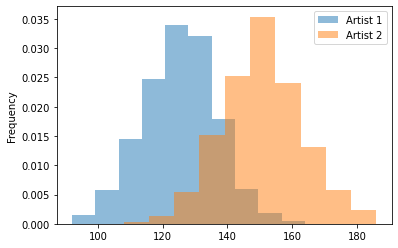

In [60]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

In [61]:
artist_list = []
song_list = []
lyrics_list = []

for artist in lyrics:
    for song, lyric in lyrics[artist].items():
        artist_list.append(artist)
        song_list.append(song)
        lyrics_list.append(lyric)

lyrics_df = pd.DataFrame()
lyrics_df['artist'] = artist_list
lyrics_df['song'] = song_list
lyrics_df['lyrics'] = lyrics_list

lyrics_df.head()

,artist,song,lyrics
0,robyn,includemeout,"""Include Me Out""\n\n\n\nIt is really very simp..."
1,robyn,electric,"""Electric""\n\n\n\nElectric...\n\nIt's electric..."
2,robyn,beach2k20,"""Beach 2K20""\n\n\n\n(So you wanna go out?\nHow..."
3,robyn,lovekills,"""Love Kills""\n\n\n\nIf you're looking for love..."
4,robyn,timemachine,"""Time Machine""\n\n\n\nHey, what did I do?\nCan..."


Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: This is to match for single whitespace characters.


In [62]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

artist
cher     AxesSubplot(0.125,0.125;0.775x0.755)
robyn    AxesSubplot(0.125,0.125;0.775x0.755)
Name: lyric_len, dtype: object

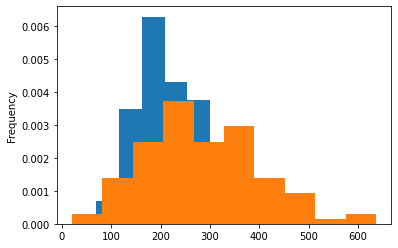

In [63]:
lyrics_df['lyric_token'] = lyrics_df['lyrics'].apply(tokenize_lyrics)
lyrics_df['lyric_len'] = lyrics_df['lyric_token'].apply(len)

lyrics_df.groupby('artist')['lyric_len'].plot(kind = 'hist', density = True)